# Underfitting vs. Overfitting

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [49]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

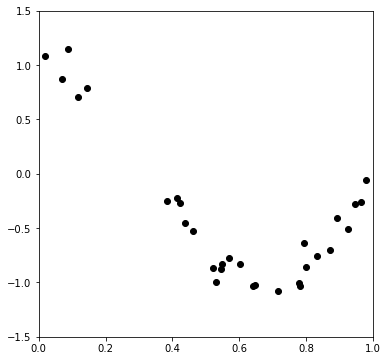

In [50]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

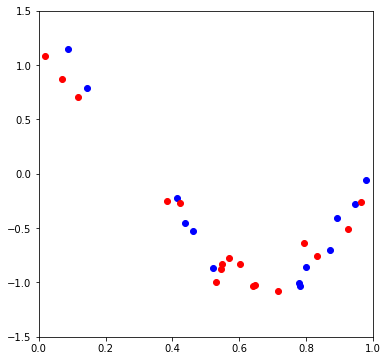

In [51]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics
from sklearn import datasets, linear_model

[0.0871293  0.14335329 0.41466194 0.43758721 0.46147936 0.52184832
 0.77815675 0.78052918 0.79915856 0.87001215 0.891773   0.94466892
 0.97861834]
[ 1.14386208  0.78494746 -0.22066063 -0.4562644  -0.53001927 -0.86481449
 -1.00713288 -1.03009698 -0.86230652 -0.70023795 -0.41043495 -0.27907117
 -0.06189804]


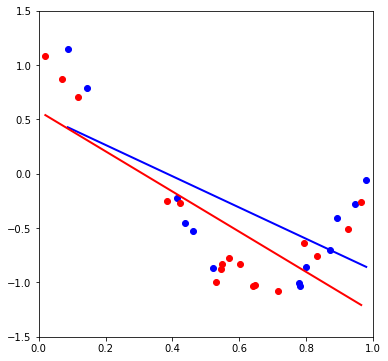

In [53]:
print(X1)
print(y1)

modelx1Lin = linear_model.LinearRegression()
modelx1Lin.fit(np.vstack(X1), y1)

modelx2Lin = linear_model.LinearRegression()
modelx2Lin.fit(np.vstack(X2), y2)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
plt.plot(X1, modelx1Lin.predict(np.vstack(X1)), color='blue',linewidth=2)
plt.plot(X2, modelx2Lin.predict(np.vstack(X2)), color='red',linewidth=2)
plt.show()


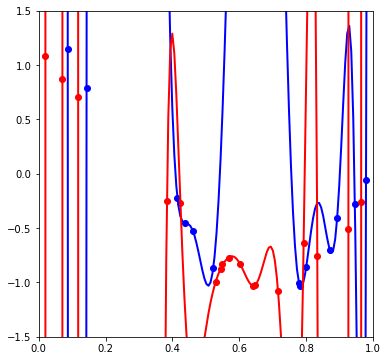

In [54]:
modelx1Pol = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
modelx1Pol.fit(np.vstack(X1), y1)

modelx2Pol = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
modelx2Pol.fit(np.vstack(X2), y2)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x_plot, modelx1Pol.predict(x_plot), color='blue',linewidth=2)
plt.plot(x_plot, modelx2Pol.predict(x_plot), color='red',linewidth=2)
plt.show()

-7134944904323.548
-122075.84283125738


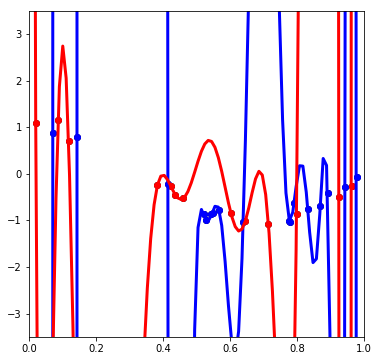

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


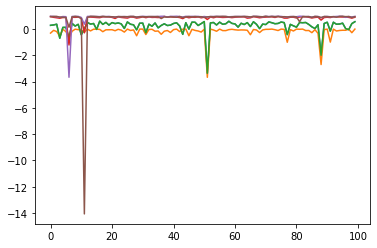

In [47]:
from sklearn.model_selection import train_test_split
import pandas as pd

r_square = []

for i in range(100):
    X = np.vstack(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    row = []
    
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    
    row.append(metrics.r2_score(y_test,model.predict(X_test)))
    
    for i in range(6):
        model = make_pipeline(PolynomialFeatures(i), linear_model.LinearRegression())
        model.fit(X_train, y_train)
        row.append(metrics.r2_score(y_test,model.predict(X_test)))
        
    r_square.append(row)
    
r_square = np.array(r_square)

plt.plot(r_square[:,0])
plt.plot(r_square[:,1])
plt.plot(r_square[:,2])
plt.plot(r_square[:,3])
plt.plot(r_square[:,4])
plt.plot(r_square[:,5])